# Volatility Surface

블랙 숄즈 방정식과 저희가 이전 세션까지 실행하던 파생상품의 가격결정은 모두 $\sigma$, 즉 기초자산의 변동성이 상수라는 것을 가정합니다. 하지만 실제 시장에서는 이 가정이 성립하지 않습니다. 이번 세션에서는 파생상품의 가격 결정을 할 때 이 현상으로 인한 오차를 정정하는 방법을 공부합니다.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
N = norm.cdf
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import scipy

def CallOptionBS(S, K, T, r, q, sigma):
    if T == 0.0:
        return np.maximum(S - K, 0)
    else:
        d1 = (np.log(S / K) + (r - q + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return S * np.exp(-q * T) * N(d1) - K * np.exp(-r * T) * N(d2)
def callequation(sigma,K, T, r, q, st,Q):
    return CallOptionBS(st, K, T, r, q, sigma)-Q

def todate(the_list):
    return [dt.datetime.strptime(item, '%B %d, %Y') for item in the_list]

## 1. 내재 변동성

이전 세션까지는 옵션의 변동성을 상수로 설정하고 가격을 계산했습니다. 실제 시장에서도 이런 가정이 성립하는지 확인하겠습니다.<br>
우선 변동성의 변화에 따른 옵션 가격의 변화를 보면 다음과 같습니다.

(0.01, 1.0)

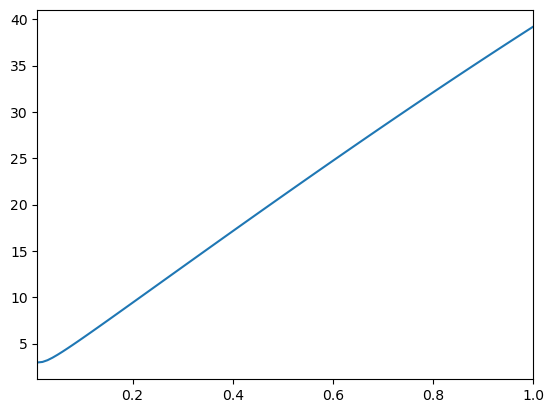

In [2]:
s0 = 100
K = 100
r = 0.03
q = 0
T = 1
CallbyVol = pd.DataFrame(columns = ["vol","price"],index = range(0,100))
for i in range(0,100):
    CallbyVol.iloc[i,0] = (i+1)/100
    CallbyVol.iloc[i,1] = CallOptionBS(s0, K, T, r, q, (i+1)/100)
plt.plot(CallbyVol["vol"],CallbyVol["price"])
plt.xlim(0.01,1.0)

이처럼 변동성이 증가함에 따라 옵션 가격은 단조적으로 증가하고, 따라서 옵션 가격과 기초자산의 현재가, 행사가, 이자율, 만기가 옵션의 가격과 함께 정해진다면 그 옵션의 변동성을 역으로 계산하는 것이 가능합니다. 그리고 이렇게 구한 변동성을 내재 변동성(Implied Volatility) 라고 합니다. 이제 실제 옵션 데이터로부터 내재 변동성을 구합니다.

In [3]:
Option = pd.read_excel("S&P500_option.xlsx")
Option = Option[Option["price"]!=0]
Option = Option[Option["expire"]>0.05]
Option["IV"] = 0
error = []
r = 0.05
for i in range(0,Option.shape[0]):

    try:
        K = Option.iloc[i,2]
        T = Option.iloc[i,3]
        S = Option.iloc[i,1]
        c = Option.iloc[i,4]
        Option.iloc[i,5] = scipy.optimize.fsolve(callequation,0.2,args = (K,T,r,0,S,float(c)))
        if CallOptionBS(S, K, T, r, 0, Option.iloc[i,5])!=c:
            error.append(i)
        
    except ValueError:
        error.append(i)
Option = Option.drop(error)
Option = Option[Option["IV"]!=0.2]

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration 

KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 208, 210, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 250, 251, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 515, 516, 517, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 540, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 562, 563, 565, 566, 567, 568, 570, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 590, 591, 594, 595, 596, 597, 598, 599, 600, 601, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 770, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 836, 837, 838, 839, 840, 841, 842, 843, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 863, 864, 865, 866, 867, 868, 869, 870, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 948, 949, 950, 951, 952, 953, 954, 955, 956, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 972, 973, 974, 975, 976, 977, 978, 979, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 996, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1181, 1182, 1183, 1184, 1185, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1335, 1336, 1337, 1338, 1339, 1340, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1415, 1417, 1418, 1419, 1420, 1421, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1431, 1432, 1433, 1434, 1436, 1437, 1438, 1439, 1440, 1441, 1443, 1444, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1520, 1521, 1522, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 2109, 2116, 2117, 2118, 2120, 2124, 2138, 2140, 2142, 2159, 2640, 2641, 2644, 2645, 2648, 2649, 2653, 2656, 2657, 2661, 2666, 2667, 2671, 2672, 2673, 2674, 2678, 2679, 2680, 2682, 2684, 2688, 2697, 2698, 2699, 2717, 2729, 2750, 2929, 2933, 2934, 2939, 2972, 2974, 2976, 2977, 2988, 2990, 2993, 2994, 2995, 2996, 2997, 2999, 3002, 3004, 3006, 3007, 3065, 3289, 3297, 3300, 3303, 3305, 3308, 3311, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3324, 3325, 3326, 3327, 3328, 3331, 3332, 3333, 3334, 3335, 3338, 3339, 3340, 3346, 3347, 3348, 3362, 3582, 3761, 3768, 3771, 3773, 3775, 3777, 3778, 3782, 3783, 3784, 3785, 3786, 3787, 3789, 3790, 3791, 3794, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3804, 3807, 3808, 3814, 3815, 3827] not found in axis'

이제 같은 만기를 가진 옵션들의 내재 변동성과 행사가의 관계를 보면 다음과 같습니다

In [ ]:
T = Option['expire'].unique()[17]
OptionT = Option[Option['expire']==T]

In [ ]:
plt.plot(OptionT["K"],OptionT["IV"])
plt.vlines(S, 0, 1.0, color='gray', linestyle='solid', linewidth=3)

현재가 근처에서 낮은 변동성을 보이고 내가격과 외가격에서 높은 변동성을 보이는 것을 확인할 수 있습니다. 이러한 현상을 변동성 스마일이라고 합니다. 그리고 이러한 변동성을 z축으로, 행사가와 만기를 각각 x.y축으로 가지는 그래프를 내재 변동성 곡면이라고 합니다.

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(Option["expire"], Option["K"], Option["IV"], linewidth=0.1, antialiased=True)
ax.set_zlim(0,0.4)

## 2. 국소 변동성 곡면에 대한 설명

이렇듯 행사가, 만기마다 각각 내재 변동성이 다르기 때문에 몬테카를로 시뮬레이션이나 유한차분법을 시행할 때 상수 변동성을 사용하는 것은 큰 오류를 낳을 수 있습니다. 이런 현상을 보정하기 위해 쓰는 방법으로 국소 변동성 곡면(Local Vol Surface)이 있습니다.<br>
내재 변동성 곡면은 (K,T)$\rightarrow \sigma$인 함수이기 때문에 이를 시뮬레이션이나 유한차분법에 이용할 수 없습니다. <br>그래서 만들어진 것이 국소 변동성 곡면입니다.<br> 국소 변동성 곡면은 (S,T)$\rightarrow \sigma$ 인 함수이므로 각 노드, path와 시점에서 S와 T가 주어지는 두 기법에 사용할 수 있습니다. 그리고 이상적인 국소 변동성 곡면을 이용하면 시장에 있는 모든 상품을 평가할 수 있습니다. <br>
예를 들어 국소 변동성 곡면을 사용해 몬테카를로 시뮬레이션의 패스를 만들고, 만기에서 수익구조만 변경해주는 것으로 내재 변동성의 변경 없이 해당 만기를 가지는 모든 콜옵션의 가격을 정확히 계산할 수 있습니다.<br>

국소 변동성 곡면을 만드는 방법은 간단합니다. 내재 변동성 곡면의 데이터나 옵션의 가격을 듀파이어 공식에 넣으면 됩니다.<br>
듀파이어 공식은 다음과 같습니다.첫 번째는 옵션의 가격을 이용한 공식입니다.
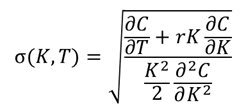

두 번째는 내재 변동성 곡면을 이용한 공식입니다.



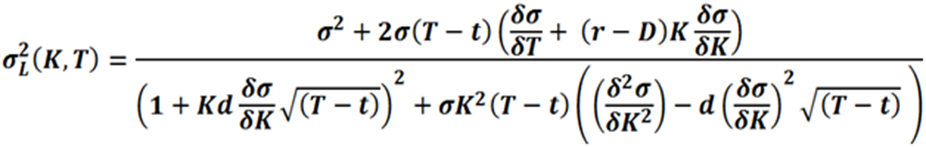

이 공식에서 문제가 되는 항들은 미분항입니다. 시장에는 연속하게 만기와 행사가가 있는 것이 아니고, 주어진 몇 개의 행사가와 만기만이 있기 때문에 불연속한 데이터를 보정해 위 공식에 대입해야 합니다. 데이터를 보정하는 방법에 대해 학습하겠습니다.

# 3. 국소 변동성 곡면 산출

## 3-1. 단순 보간

첫 번째 방법은 여러 가지 보간법을 이용해 빈 데이터를 채우고, 미분값들을 계산하는 것입니다. 대표적인 보간 방법으로는 선형 보간과 스플라인 보간이 있습니다. 선형 보간은 떨어진 두 점을 직선으로 잇는 것이고, 스플라인 보간은 두 점 사이를 다항식으로 잇되, 한 점에서 만나는 만나는 두 다항식의 함숫값과 미분값이 같도록 계수를 정하는 보간법입니다.

## 3-2. Closed Form Solution (Heston)

두 번째 방법은, 변동성을 요구하지 않는 옵션 가격 결정 모형을 사용해 빈 곳의 가격을 채우는 것입니다. <br>
이 때 쓰는 모형이 Heston 모형입니다. Heston 모형은 기초자산의 가격이 다음과 같은 움직임을 보입니다.
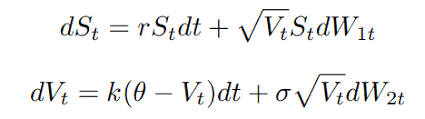
이 때, $k$는 회귀 계수, $\theta$는 변동성의 평균, $\sigma$는 변동성의 변동성입니다.<br>
Heston 모형을 쓰는 이유는 이 모형은 옵션 가격의 닫힌해가 존재하기 때문입니다.

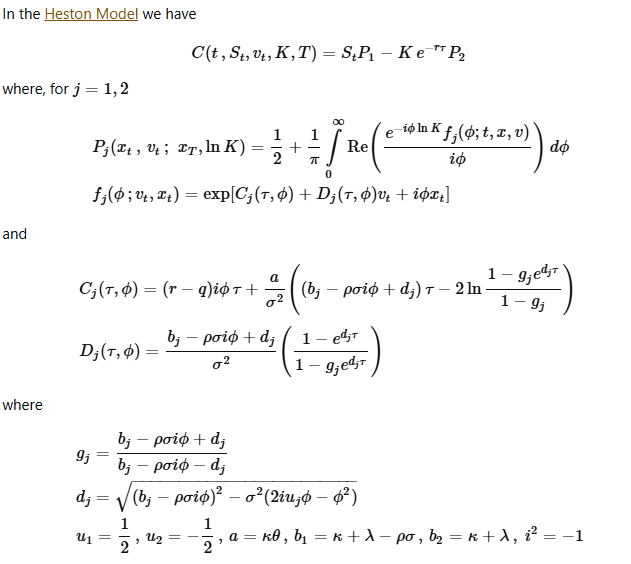
이 공식을 프로그래밍으로 구현해 원하는 모든 점 (K,T)에서의 옵션 가격을 구하고, 이를 듀파이어 공식에 대입해 국소 변동성 곡면을 구하면 됩니다.

## 3-3. approximate solution (SABR)

마지막 방법은 내재 변동성을 매개변수화 시키는 것입니다. 이때 사용하는 모형이 SABR 모형입니다.<br>
SABR 모형은 기초자산이 다음과 같은 움직임을 보입니다.
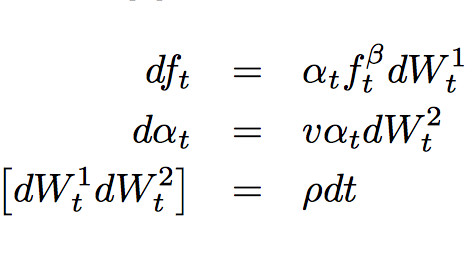
SABR 모형을 사용하는 이유는 SABR 모형은 내재 변동성의 근사해가 존재하기 때문입니다.

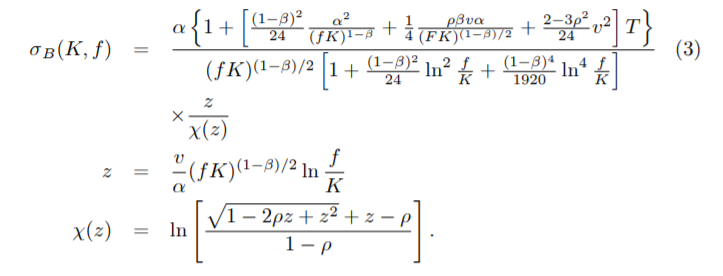
이 공식을 이용해 모든 만기에 대한 변동성 스마일을 완성하고, 시간축에 대해 적절히 보간하여 내재 변동성 곡면을 완성한 뒤, 이를 듀파이어 공식에 대입해 국소 변동성 곡면을 구합니다.